#                 PREDICT A CAR PRICE - REGRESSION ALOGRITHMS

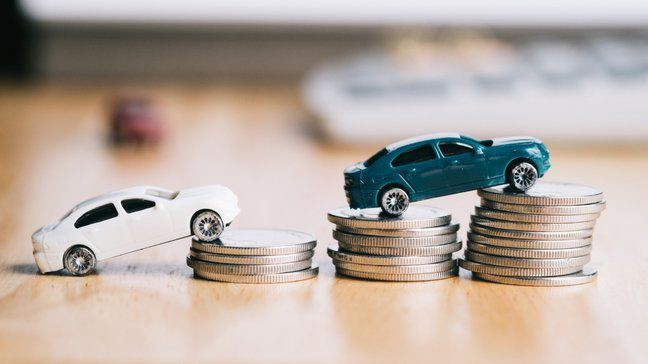

# Table of content

## 1. Problem Statement

## 2. Installing and Importing Packages
      2.1 Importing Libraries
## 3. Loading Data

## 4. Data Acquistititon and Description

     4.1 Description of the Dataset
     4.2 Data Information
## 5. Data Wrangling

     5.1 Data Cleaning
## 6. Exploratory Data Analysis

     6.1 Univariate Analysis
     6.2 Bivariate Analysis
## 7. Data Postprocessing
     7.1 Encoding Categorical Variables
     7.2 Separating Train and Test Data
     7.3 Feature Engineering
     
## 8. Modelling

     8.1 Defining Baseline Models
     8.2 Hyperparameter Tuning
## 9. Test Set

## 10. Conclusion

# 1. Problem Statement

- A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

- They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car?

How well those variables describe the price of a car?

#### You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# 2.Installing and importing packages
## 2.1 Importing libraries

In [1]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                    # Importing for data analysis
#------------------------------------------------------------------------------------------------------------------------------
import seaborn as sns                                                  # Importing for data visualization
import matplotlib.pyplot as plt 
import plotly.express as ex                                            # Importing Plotly Express for Dynamic Plotting
import plotly.graph_objs as go                                         # Importing Plotly graphs for Dynamic Plotting
#------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                     # Importing numpy package(for Numberical Python )
#------------------------------------------------------------------------------------------------------------------------------
import warnings                                                        #Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                      # Warnings will appear only once
#------------------------------------------------------------------------------------------------------------------------------
from sklearn import preprocessing                                      # Calling preprocessing for preprocessing of data
from sklearn.preprocessing import StandardScaler                       # Calling standardscaler for standerdization
from sklearn.preprocessing import MinMaxScaler,LabelEncoder            # Calling MinMaxScaler,LabelEncoder for Encoder
#------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics                                            # Calling the metrics for calculating performence metrics
from sklearn.metrics import mean_squared_error                         # Importing MSE
from sklearn.metrics import r2_score                                   # Importing R Squared
from sklearn.metrics import mean_absolute_error                        # Importing MAE
#-----------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                   # Calling train_test_split for splitinng the dataset 
from sklearn.model_selection import RandomizedSearchCV                 # Calling RandomizedSearchCV for tuning the model
from sklearn.model_selection import cross_val_score                    # Importing cross_val_score  
from sklearn.model_selection import GridSearchCV                       # Importing GridsearchCV
#-----------------------------------------------------------------------------------------------------------------------------

# 3. Loading Data

In [3]:


  data_1=pd.read_csv("CarPrice_Assignment.csv")



In [4]:


  data_1.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:

data_1.shape


(205, 26)

### Observation:-

-  Total **205** rows and **26** features are collected.

# 4.Data Acquistititon and Description

## 4.1 Description of data

In [6]:
  
 data_1.describe()   
    

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Observation:-

 - The mean of **car price**   is around **$13276.7** from the given data.


## 4.1 Data Information

- In section, it will show the information about the entire data.

In [7]:

  data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Observation:-


- Total **18** Numberical datatypes,  **8** Object type datatypes.

# 5.Data wrangling

### 5.1 Data cleaning

In this section, we will clean out our data based on the information retrieved from the previous observations.

Hence, we will have to perform the following subtasks

- Checking for **missing values** and manipulating them

- Checking the **datatypes**

- Checking of the **Spelling Correction**

In [8]:
data_1.isnull().sum()     # Check the missing value


 #(if missing value arrive:data_1["missing_value_column name"]=data_1.fillna(data_1["missing_value_column name"].mean()))


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:

data_1.dtypes              # Check the datatype


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:

# To rename the features name
data_1.columns
data_1.rename(columns={"aspiration":"Aspiration","boreratio":"Bore/ratio","citympg":"City(mpg)",
                       "cylindernumber":"Cylinder Number",
                       'highwaympg':"Highway(mpg)","fueltype":"Fuel Type","fuelsystem":"Fuel System","drivewheel":"Drive Wheel",
                       "carbody":"Car Body","enginelocation":"Engine Location","doornumber":"Door Number",},inplace=True)



In [11]:
# Replacing data with the respective values:

data_1["Drive Wheel"].replace(to_replace = ["4wd"], value ="fwd",inplace=True)

#Example:  #data["AREA"].replace(to_replace=["Karapakam","KKNagar","Velchery","Ana Nagar","Ann Nagar","Adyr","TNagar"], 
                     #value=["Karapakkam","KK Nagar","Velachery","Anna Nagar","Anna Nagar","Adyar","T Nagar"]  
                    #,inplace=True)

In [12]:
data_1.dtypes

car_ID                int64
symboling             int64
CarName              object
Fuel Type            object
Aspiration           object
Door Number          object
Car Body             object
Drive Wheel          object
Engine Location      object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
Cylinder Number      object
enginesize            int64
Fuel System          object
Bore/ratio          float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
City(mpg)             int64
Highway(mpg)          int64
price               float64
dtype: object

In [13]:
# To remove the unwanted feature
data_1.drop(["CarName"],inplace=True,axis=1)

In [14]:
data_1

,car_ID,symboling,Fuel Type,Aspiration,Door Number,Car Body,Drive Wheel,Engine Location,wheelbase,carlength,...,enginesize,Fuel System,Bore/ratio,stroke,compressionratio,horsepower,peakrpm,City(mpg),Highway(mpg),price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,fwd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Observation:-
  - There is no **missing value**,**spelling mistake** and **mismatch datatype** are identified.
  - Car name removed from the feature.

# 6. Exploring Data Analysis
 EDA is applied to **investigate the data** and **summarize the key insights**. It will give you the basic understanding of your data, it's distribution, null values and much more. You can either explore data using **graphs** or through some python functions.

### 6.1 Univariate Analysis
 **Univariate analysis** is the analysis of one variable at a time.

**1) Insight plot of categorical features :**

In [15]:
Type=data_1.dtypes
Type

car_ID                int64
symboling             int64
Fuel Type            object
Aspiration           object
Door Number          object
Car Body             object
Drive Wheel          object
Engine Location      object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
Cylinder Number      object
enginesize            int64
Fuel System          object
Bore/ratio          float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
City(mpg)             int64
Highway(mpg)          int64
price               float64
dtype: object

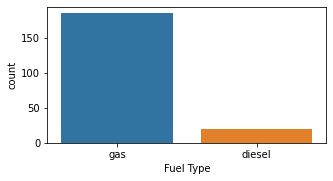

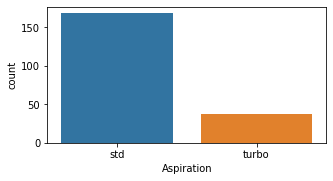

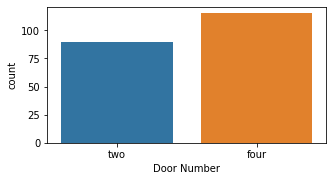

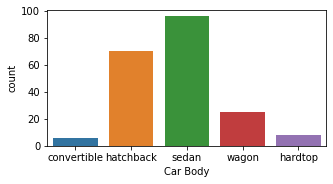

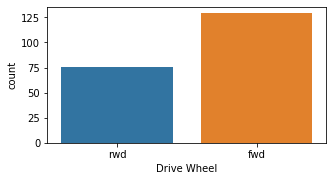

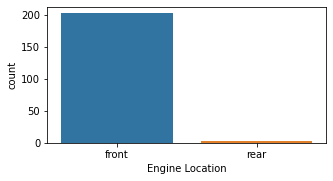

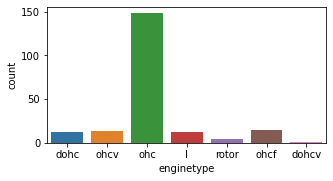

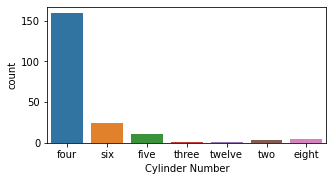

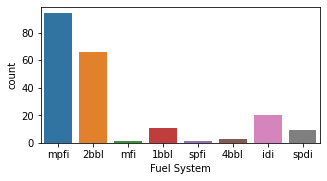

In [16]:
for s in data_1.columns:
    if Type[s]=="object":
        plt.figure(figsize=(5,2.5))
        sns.countplot(data_1[s])
        plt.xlabel(s)

### Observation:-
- It show the usage of gas is higher than the fuel in Americian market.
- Highest number of cylinder used is **four** and four door cars are favoured.
- Engine type of **ohc** has high demand and huge sales in market.
- Car body of sedan has the most used product in the market.

**2) Average price of Engines/FuelType/Carbody/Cylinder number**

In [17]:
Enginetype=data_1.groupby(by="enginetype")["price"].mean().sort_values(ascending=False)
Fueltype=data_1.groupby(by="Fuel Type")["price"].mean().sort_values(ascending=False)
Carbody=data_1.groupby(by="Car Body")["price"].mean().sort_values(ascending=False)
Cylinder_number=data_1.groupby(by="Cylinder Number")["price"].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='Cylinder Number'>

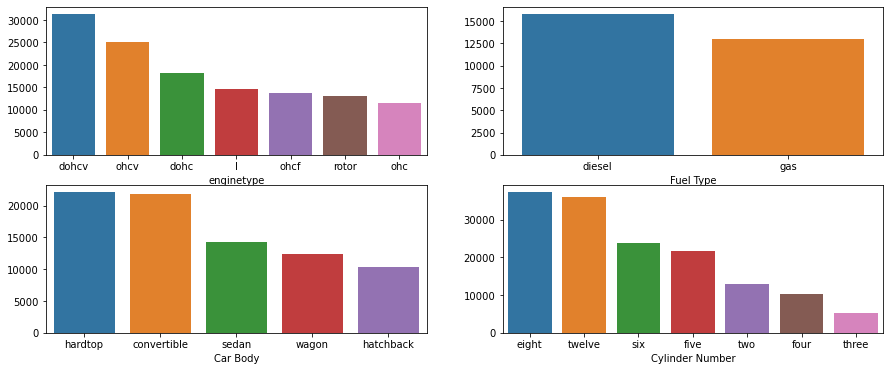

In [18]:

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.barplot(Enginetype.index,Enginetype.values)

plt.subplot(2,2,2)
sns.barplot(Fueltype.index,Fueltype.values)

plt.subplot(2,2,3)
sns.barplot(Carbody.index,Carbody.values)

plt.subplot(2,2,4)
sns.barplot(Cylinder_number.index,Cylinder_number.values)




### Observation:-
- In car body,sedan has the highest count but the highest average price is **Hardtop**(25000) and the least average is **Hatchback**(10000)
- The average value of diesel is **15000** in Fueltype data.

**3)  Insight distribution of Numerical features**

In [19]:
plot=['price',"wheelbase","enginesize","peakrpm","horsepower"]

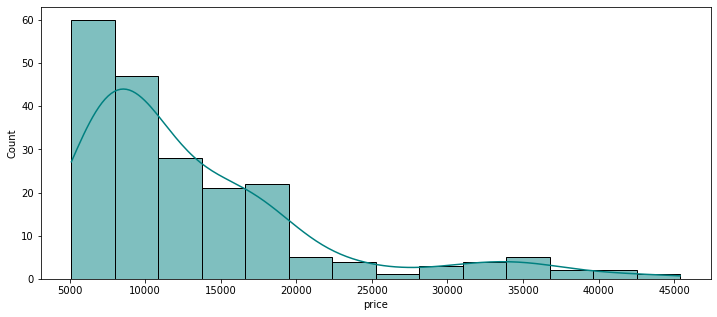

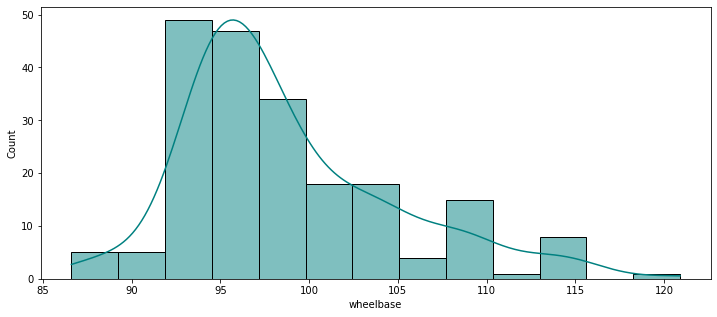

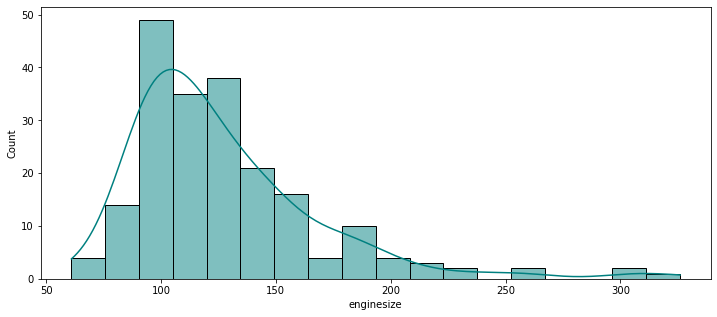

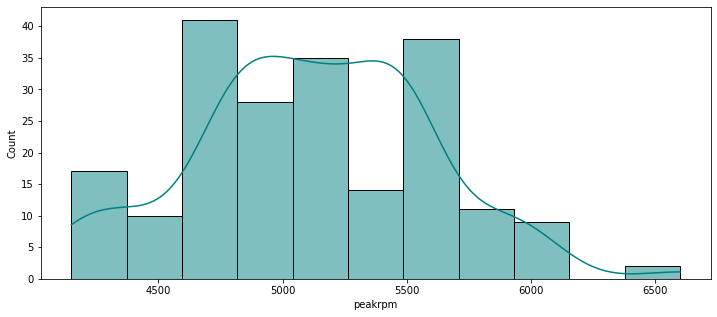

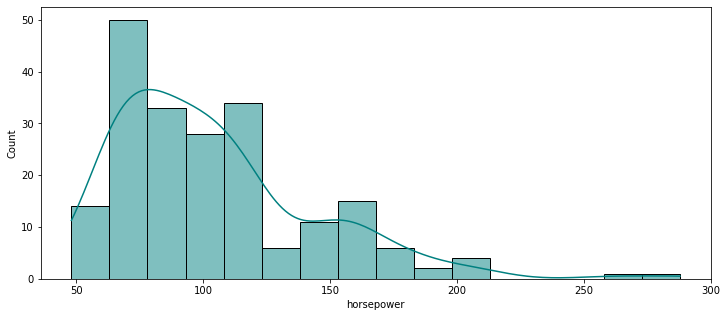

In [20]:


for i in plot:
    plt.figure(figsize=(12,5))
    sns.histplot(data_1[i],color="teal",kde=True)
    
                            
       

### Observation:-
- Distribution shows that the **85%** of price lies between 5000 and 20000 and price distriibution is **Right-Skew**.





## 6.2 Bivariate analysis
**Bivariate analysis** is the analysis of **two or more** variable at a time.

**1)  Relationship between variables**

<AxesSubplot:>

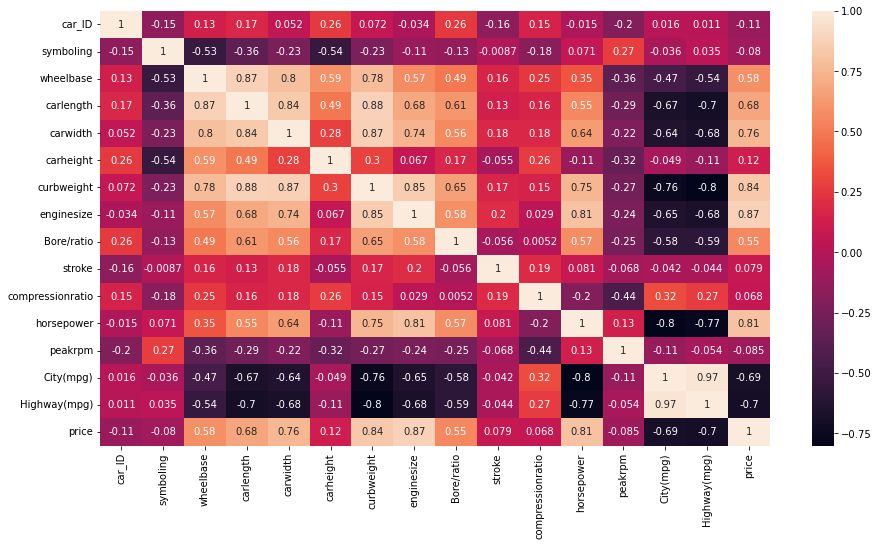

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data_1.corr(),annot=True)

### Observation:-
- This picture shows the relationship between the variables.
- Enginesize value change then 87% of the price value increase in Positive way.
- Curbweight change then 85% of the price value increase in Positive way.
- Both the data correlation coefficient value is **Positive Correlation**.

<AxesSubplot:xlabel='curbweight', ylabel='price'>

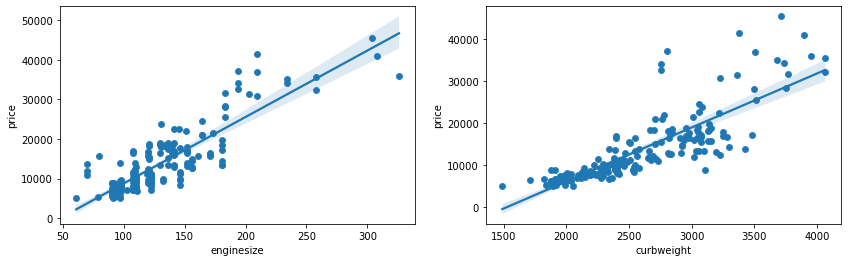

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.scatterplot(data_1.enginesize,data_1.price)
sns.regplot(data_1.enginesize,data_1.price)

plt.subplot(1,2,2)
sns.scatterplot(data_1.curbweight,data_1.price)
sns.regplot(data_1.curbweight,data_1.price)


# 7. Data Postprocessing:

### 7.1 Encoding Categorical Features:
- Encoding categorical data is a process of **converting categorical data into integer format** so that the data with converted    categorical values can be provided to the different models.

In [23]:

Type


car_ID                int64
symboling             int64
Fuel Type            object
Aspiration           object
Door Number          object
Car Body             object
Drive Wheel          object
Engine Location      object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
Cylinder Number      object
enginesize            int64
Fuel System          object
Bore/ratio          float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
City(mpg)             int64
Highway(mpg)          int64
price               float64
dtype: object

In [24]:


for u in data_1.columns:
    if(Type[u]=="object"):
        print(data_1[u].value_counts())
        
        

gas       185
diesel     20
Name: Fuel Type, dtype: int64
std      168
turbo     37
Name: Aspiration, dtype: int64
four    115
two      90
Name: Door Number, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: Car Body, dtype: int64
fwd    129
rwd     76
Name: Drive Wheel, dtype: int64
front    202
rear       3
Name: Engine Location, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: Cylinder Number, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: Fuel System, dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()


In [26]:



data_1["Fuel Type"]=Label.fit_transform(data_1["Fuel Type"])
data_1["Aspiration"]=Label.fit_transform(data_1["Aspiration"])
data_1["Door Number"]=Label.fit_transform(data_1["Door Number"])
data_1["Car Body"]=Label.fit_transform(data_1["Car Body"])
data_1["Drive Wheel"]=Label.fit_transform(data_1["Drive Wheel"])
data_1["Engine Location"]=Label.fit_transform(data_1["Engine Location"])
data_1["enginetype"]=Label.fit_transform(data_1["enginetype"])
data_1["Cylinder Number"]=Label.fit_transform(data_1["Cylinder Number"])
data_1["Fuel System"]=Label.fit_transform(data_1["Fuel System"])





In [27]:
data_1.dtypes

car_ID                int64
symboling             int64
Fuel Type             int32
Aspiration            int32
Door Number           int32
Car Body              int32
Drive Wheel           int32
Engine Location       int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
Cylinder Number       int32
enginesize            int64
Fuel System           int32
Bore/ratio          float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
City(mpg)             int64
Highway(mpg)          int64
price               float64
dtype: object

###### Result: Almost every feature has been converted to integer format for easy access of the model.

### 7.2 Separating train and test data:
The train-test split is used to **estimate the performance of machine learning algorithms** that are applicable for prediction-based Algorithms/Applications. This method is a **fast and easy procedure to perform such that we can compare our own machine learning model results to machine results**.

In [28]:
X=data_1.drop(["price"],axis=1)
Y=data_1["price"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=45)

In [30]:
X_train.shape,X_test.shape

((143, 24), (62, 24))

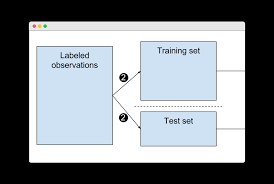

#### Result: The data is separated 70% train data and 30% test data for model performance. 

### 7.3 Feature Scaling:
Feature Scaling is a technique to **standardize the independent features** present in the data in a fixed range.
So the X_train and X_test data should standardize for easy preformance.In standardizing, the mean and range should br 0 to 1. 

In [31]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_Scaler=Scaler.fit_transform(X_train)
X_test_Scaler=Scaler.transform(X_test)

In [32]:
X_test_Scaler

array([[ 0.7751997 , -0.61608312,  0.31622777, ..., -0.73763795,
        -0.3217526 , -0.24523878],
       [-0.63737597, -0.61608312,  0.31622777, ..., -0.73763795,
         0.11230987,  0.17225105],
       [ 1.14516   ,  1.03064373,  0.31622777, ..., -0.73763795,
        -0.17706511, -0.1060755 ],
       ...,
       [-0.33468118,  1.85400715,  0.31622777, ..., -0.31905768,
        -0.90050257, -0.94105516],
       [ 1.48148754,  1.85400715,  0.31622777, ...,  0.72739298,
        -0.17706511, -0.24523878],
       [ 0.85928159, -0.61608312,  0.31622777, ..., -0.73763795,
         0.83574733,  0.86806743]])

# 8.Modeling

### 8.1 Defining baseline model:
A baseline model is essentially a simple model that acts as a reference in a machine learning project. **Its main function is to contextualize the results of trained models**. Baseline models usually lack complexity and may have little predictive power.

In [33]:
from sklearn.neighbors import KNeighborsRegressor                   # Importing KNN
from sklearn.ensemble import RandomForestRegressor                  # Importing Random Forest Regressor
from sklearn.ensemble import BaggingRegressor                       # Importing Bagging Regressor
from sklearn.tree import DecisionTreeRegressor                      # Importing DecissionTreeeRegressor                            
from sklearn.linear_model import LinearRegression                   # Importing LinearRegression




# Defining the scores list
model_scores = []

# Defining a list of useful regressors
regressors = [RandomForestRegressor(),
              KNeighborsRegressor(),
              BaggingRegressor(),
              LinearRegression()]

In [34]:


for i in regressors:
    
    #Importing model name
    model_name=type(i).__name__
    
    # Fitting the train data in model
    i.fit(X_train,Y_train)
    
    #Predict the train data using model
    y_pred_train=i.predict(X_train)
    
    #Predict the test data using model
    y_pred_test=i.predict(X_test)
    
    #Calculating train R2 score
    R2_score_train=r2_score(Y_train,y_pred_train)
    
    #calculating test R2 score
    R2_score_test=r2_score(Y_test,y_pred_test)
    
    
    print("Model name:",model_name)
    print("R2_score_train:",R2_score_train)
    
    print(" R2_score_test:", R2_score_test)
    
    model_scores.append((model_name,R2_score_train,R2_score_test))
    
   

Model name: RandomForestRegressor
R2_score_train: 0.9893602862253864
 R2_score_test: 0.9158547953548067
Model name: KNeighborsRegressor
R2_score_train: 0.9079959465171196
 R2_score_test: 0.8158167202989743
Model name: BaggingRegressor
R2_score_train: 0.987448841777838
 R2_score_test: 0.8898246057466188
Model name: LinearRegression
R2_score_train: 0.9038905143120971
 R2_score_test: 0.8456306246862354


**R2 score** is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [35]:
model_scores

[('RandomForestRegressor', 0.9893602862253864, 0.9158547953548067),
 ('KNeighborsRegressor', 0.9079959465171196, 0.8158167202989743),
 ('BaggingRegressor', 0.987448841777838, 0.8898246057466188),
 ('LinearRegression', 0.9038905143120971, 0.8456306246862354)]

In [36]:
Model=pd.DataFrame(data=model_scores,columns=["model_name","R2_score_train","R2_score_test"])

In [37]:
Model

,model_name,R2_score_train,R2_score_test
0,RandomForestRegressor,0.989360,0.915855
1,KNeighborsRegressor,0.907996,0.815817
2,BaggingRegressor,0.987449,0.889825
3,LinearRegression,0.903891,0.845631


In [38]:
# To find the best test R2 score(plot bar chart)

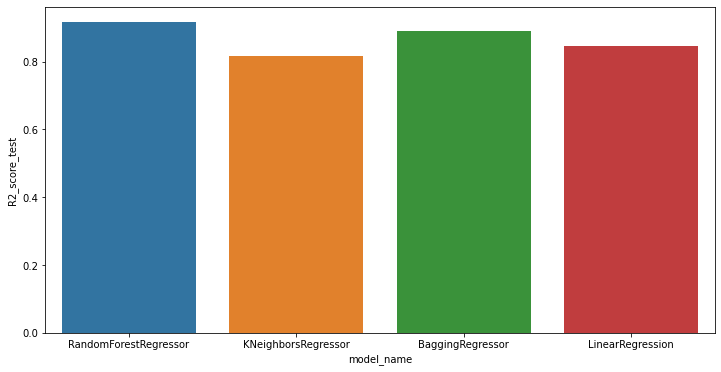

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(Model.model_name,Model.R2_score_test);

### Observation:-
- **RandomForest Regression** gives the best r2 score and Low Basis and low variance **(low overfitting)** among the models, so the RandomForest Regression will be used for **Hyperparameter tunning**.

### 8.2 Hyperparameters Tuning:
Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning and also used **to find out the best model**.

- We will be using Random Search in order to find the best values.

- We will consider  RandomForest Regression as they have given best results

In [53]:
para_grid={'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
            'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


RFR =RandomForestRegressor(random_state=42)
random_tuning_model = RandomizedSearchCV(estimator = RFR,
                          param_distributions = para_grid,
                          scoring ='r2',
                          cv = 5)


random_tuning_model.fit(X_train, Y_train)


Y_pre=random_tuning_model.predict(X_train)

# Printing metrics
print("[Hyperparameters]:", random_tuning_model.best_params_)
print("[Train Score]:", random_tuning_model.best_score_)
print("[Validation Score]:", r2_score(Y_train,
                                      Y_pre))


[Hyperparameters]: {'n_estimators': 33, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': True}
[Train Score]: 0.9106638786861891
[Validation Score]: 0.966941042463496


### Observation:-
we fought the best [Hyperparameters]: **{'n_estimators': 33, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': True}**
**[Train Score]: 0.9146482211854652**
**[Validation Score]: 0.9691344968856467**

# 9. Test set

In [54]:
# Predicting with the best fit parameters
best_fit = random_tuning_model.best_estimator_

In [55]:
# Fitting the train data in best fit model
best_fit.fit(X_train,Y_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=33,
                      random_state=42)

In [56]:
#Predicting the unseen data
y_pred_tuned=best_fit.predict(X_test)

In [60]:
#R2_score of unseen data
best_fit_R2_score=r2_score(Y_test,y_pred_tuned)
best_fit_R2_score

0.8937774595844317

In [58]:
# Making submission file
submission = pd.DataFrame({"car_ID": X_test['car_ID'], 'Salary': y_pred_tuned})
submission.head(10)

,car_ID,Salary
148,149,9468.919434
64,65,9095.618948
170,171,14362.109066
72,73,34135.200505
25,26,6354.463336
13,14,17790.377239
79,80,8713.608674
83,84,15939.809462
3,4,11048.954316
84,85,15939.809462


# 10. Conclusion
- In this case study the given data was analysed and on top of that a regression model was built.

- It can be found that **Enginesize,stroke and curbweight** are making the price high in the Amercian Market.

- The model chosen for this case study was a RandomForest Regression  as it was retruning **the least overfitting** and **best r2 score on unseen data**.

- The r2 score genarated in unseen data was **0.90** which means that the modedl performs really good and is generalizing well on unseen data.